### Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

### Load the data

In [3]:
data = pd.read_csv('1.01. Simple linear regression.csv')

In [4]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


### Create regression

In [5]:
x = data['SAT']
y = data['GPA']

#### check the shape of x and y => both are vectors of length 84 + reshape x into a matrix

In [6]:
x.shape

(84,)

In [7]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

In [8]:
y.shape

(84,)

#### feed them to our algorithm

##### make an instance of the linear regression class

In [9]:
reg = LinearRegression()

##### fit the regression. order of x and y is important, note that sklearn has a different order than statsmodels.

In [10]:
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

##### R-squared with the method .score()

In [11]:
reg.score(x_matrix, y)

0.40600391479679765

##### Coefficients with the reg.coef_ command

In [12]:
reg.coef_

array([0.00165569])

##### Intercept

In [13]:
reg.intercept_

0.275040299660279

##### make predictions

In [14]:
new_data = pd.DataFrame(data=[1740, 1700], columns=['SAT'])
new_data

,SAT
0,1740
1,1700


In [15]:
reg.predict(new_data)

array([3.15593751, 3.08970998])

In [16]:
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1700,3.089710


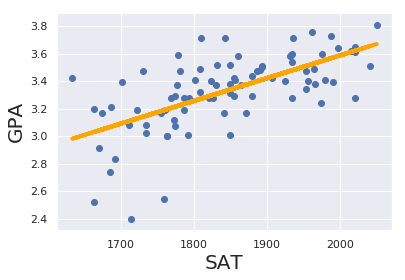

In [17]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
#yhat = 0.0017*x + 0.275
fig = plt.plot(x, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Multiple Linear regression

In [18]:
data2 = pd.read_csv('1.02. Multiple linear regression.csv')
data2.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [19]:
data2.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


### Create multiple linear regression

#### Declare the independent and dependent variables

In [20]:
x = data2[['SAT', 'Rand 1,2,3']]
y = data2['GPA']

#### Regression itself

In [21]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [23]:
reg.intercept_

0.29603261264909353

### Calculating R squared

In [24]:
reg.score(x,y)

0.40668119528142815

### Formula for Adjusted R squared
n = number of observations = 84,
p = number of predictors = 2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [25]:
x.shape

(84, 2)

In [26]:
R_adjusted = 1 - (1-reg.score(x,y)) * 83/81

In [27]:
R_adjusted

0.39203134825134

### Feature selection

In [28]:
from sklearn.feature_selection import f_regression

In [29]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [30]:
p_values = f_regression(x,y)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

In [31]:
p_values.round(3)

array([0.   , 0.676])

#### p-value of 'SAT' = 0.000 and p-value of 'Rand 1,2,3' = 0.676

### Creating a summary table

In [32]:
reg_summary = pd.DataFrame(data=x.columns.values, columns=['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [33]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)

In [34]:
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


### Create multiple linear regression

##### Declare the variables

In [35]:
x = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']

KeyError: "['Rand 1,2,3'] not in index"

#### Standardizattttt